## Preparación del notebook e importación de datos

In [41]:
# Datos
import numpy as np
import pandas as pd

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from scipy import stats
import sklearn
from sklearn import set_config

# Modelos ML de Regresion
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor

# Evaluacion
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

# Inhabilita warnings
import warnings
warnings.filterwarnings("ignore")

# Para guardar/descargar archivos comprimidos
import pickle

# Para visualizar mas columnas en un df
pd.set_option('display.max_columns',None)
# Mostrar todas las filas
pd.set_option('display.max_rows', None)

# Tamaño default de los plots
plt.rcParams["figure.figsize"] = [10,6]

In [42]:
df = pd.read_pickle("df_limpio.pkl")

## Preprocessing

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4840 entries, 0 to 4842
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   modelo                       4840 non-null   object 
 1   km                           4840 non-null   float64
 2   potencia                     4840 non-null   float64
 3   tipo_gasolina                4840 non-null   object 
 4   color                        4840 non-null   object 
 5   tipo_coche                   4840 non-null   object 
 6   volante_regulable            4840 non-null   int32  
 7   aire_acondicionado           4840 non-null   int32  
 8   camara_trasera               4840 non-null   int32  
 9   asientos_traseros_plegables  4840 non-null   int32  
 10  elevalunas_electrico         4840 non-null   int32  
 11  bluetooth                    4840 non-null   int32  
 12  gps                          4840 non-null   int32  
 13  alerta_lim_velocidad   

In [44]:
# Indicamos variables y target
target = 'precio'
features = df.columns[df.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

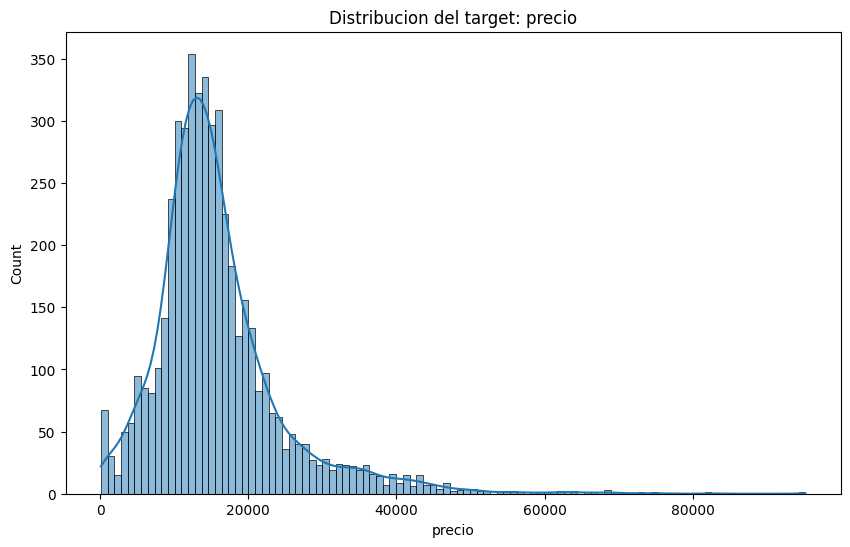

In [45]:
# Distribucion target
sns.histplot(y, kde=True)
plt.title('Distribucion del target: '+target)
plt.show()

In [46]:
# Estadísticos del target
y.describe().T

count     4840.000000
mean     15774.989657
std       8726.866284
min        100.000000
25%      10875.000000
50%      14200.000000
75%      18600.000000
max      95200.000000
Name: precio, dtype: float64

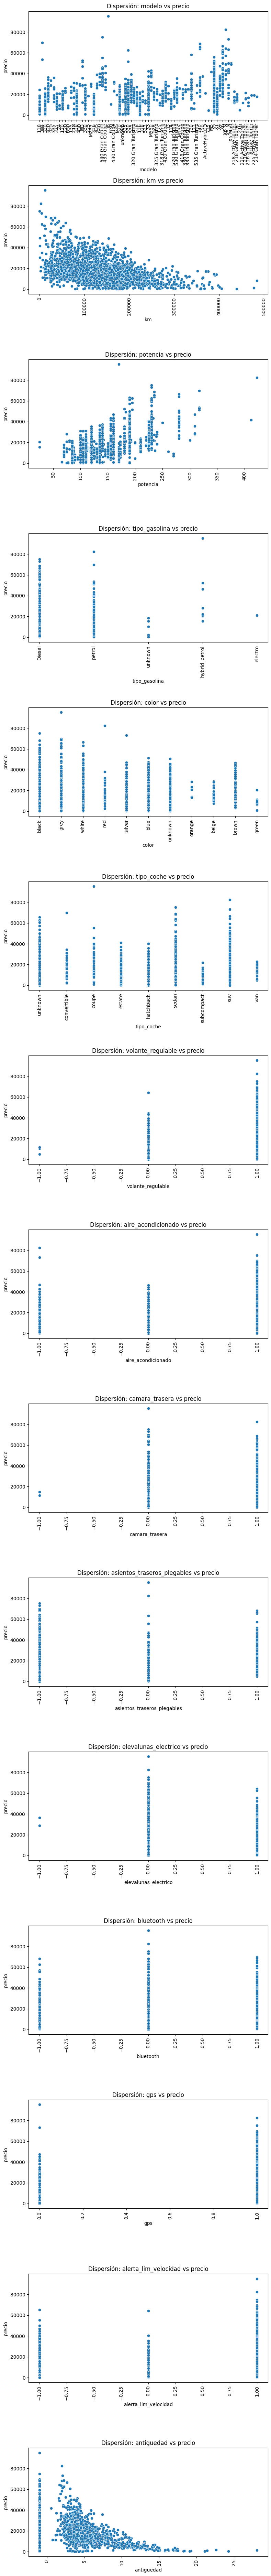

In [47]:
# Dispersion target-variable
n_features = len(features)
fig, axes = plt.subplots(n_features, 1, figsize=(8, 5*n_features))  # Ajustar el tamaño de la figura

for i, feature in enumerate(features):
    sns.scatterplot(x=df[feature], y=df[target], ax=axes[i])
    axes[i].set_title(f'Dispersión: {feature} vs {target}')
    axes[i].tick_params(axis='x', rotation=90)
    
plt.tight_layout()
plt.show()


#### Encoding categóricos

In [48]:
# Lista variables catégoricas
categories = list(df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['modelo', 'tipo_gasolina', 'color', 'tipo_coche']


In [49]:
for i in categories:
    print(df[i].value_counts())

modelo
320                  752
520                  633
318                  568
X3                   437
116                  358
X1                   274
316                  235
X5                   231
525                  184
530                  157
118                  142
318 Gran Turismo      97
320 Gran Turismo      73
518                   66
535                   46
X4                    45
X6                    44
420                   44
120                   36
730                   33
420 Gran Coupé        33
330                   33
520 Gran Turismo      23
640 Gran Coupé        19
325                   19
740                   18
530 Gran Turismo      18
X5 M                  17
114                   15
218 Active Tourer     13
218                   12
M550                  12
218 Gran Tourer        9
640                    8
418 Gran Coupé         8
X6 M                   8
335                    7
M3                     7
Z4                     6
i3                

In [50]:
# Vamos a reducir la cardinalidad. Para ello, vamos a ver el valor porcentual que representa cada categoría

In [53]:
def value_counts_porc(df, col):
    conteo = df[col].value_counts()
    porc = (conteo / len(df)) * 100
    resultados = pd.DataFrame({
        col: conteo.index,
        'conteo': conteo.values,
        'porcentaje' : porc.values
        })
    
    return resultados

def agrupar (var, porc, list1, list2):
    for i, row in list1.iterrows():
        if row["porcentaje"] < porc:
            list2.append(row[var]) 



In [54]:
# MODELO
modelo_agrup = value_counts_porc(df, 'modelo')
otro_modelo = []

In [55]:
agrupar('modelo', 1, modelo_agrup, otro_modelo)
otro_modelo

['535',
 'X4',
 'X6',
 '420',
 '120',
 '730',
 '420 Gran Coupé',
 '330',
 '520 Gran Turismo',
 '640 Gran Coupé',
 '325',
 '740',
 '530 Gran Turismo',
 'X5 M',
 '114',
 '218 Active Tourer',
 '218',
 'M550',
 '218 Gran Tourer',
 '640',
 '418 Gran Coupé',
 'X6 M',
 '335',
 'M3',
 'Z4',
 'i3',
 '528',
 '435 Gran Coupé',
 '328',
 '125',
 '216 Gran Tourer',
 '135',
 '325 Gran Turismo',
 '523',
 '430 Gran Coupé',
 '435',
 '216 Active Tourer',
 'unknown',
 '330 Gran Turismo',
 '335 Gran Turismo',
 'X5 M50',
 'M235',
 '220',
 'M4',
 '650',
 '430',
 '425',
 '750',
 '535 Gran Turismo',
 '123',
 'M5',
 '630',
 'i8',
 '735',
 'ActiveHybrid 5',
 '225',
 '216',
 '220 Active Tourer',
 '635',
 'M135',
 ' Active Tourer',
 '225 Active Tourer',
 '214 Gran Tourer']

In [56]:
df["modelo"] = np.where(df["modelo"].isin(otro_modelo), "Otro modelo", df["modelo"])

In [57]:
# TIPO GASOLINA
gasolina_agrup = value_counts_porc(df, 'tipo_gasolina')
gasolina_agrup

,tipo_gasolina,conteo,porcentaje
0,Diesel,4633,95.723140
1,petrol,191,3.946281
2,hybrid_petrol,8,0.165289
3,unknown,5,0.103306
4,electro,3,0.061983


In [58]:
# En ese caso, si es diesel 1, si es otro tipo 0
df['tipo_gasolina'] = np.where(df['tipo_gasolina']=="Diesel", 1, 0)

In [61]:
# COLOR
color_agrup = value_counts_porc(df, 'color')
otro_color = []
color_agrup

,color,conteo,porcentaje
0,black,1499,30.971074
1,grey,1069,22.086777
2,blue,646,13.347107
3,white,484,10.000000
4,unknown,444,9.173554
5,brown,302,6.239669
6,silver,292,6.033058
7,red,47,0.971074
8,beige,37,0.764463
9,green,14,0.289256


In [62]:
# Agrupamos aquellos que suponen menos de un 5%
agrupar('color', 5, color_agrup, otro_color)
otro_color

['red', 'beige', 'green', 'orange']

In [65]:
df['color'] = np.where(df['color'].isin(otro_color), 'Otro color', df['color'])

In [67]:
# TIPO COCHE
coche_agrup = value_counts_porc(df, 'tipo_coche')
otro_tipo = []
coche_agrup

,tipo_coche,conteo,porcentaje
0,unknown,1459,30.144628
1,estate,1107,22.871901
2,sedan,821,16.962810
3,suv,753,15.557851
4,hatchback,488,10.082645
5,subcompact,77,1.590909
6,coupe,76,1.570248
7,convertible,30,0.619835
8,van,29,0.599174


In [69]:
# Agrupamos debajo del 10%
agrupar('tipo_coche', 10, coche_agrup, otro_tipo)
otro_tipo

['subcompact',
 'coupe',
 'convertible',
 'van',
 'subcompact',
 'coupe',
 'convertible',
 'van']

In [70]:
df['tipo_coche'] = np.where(df['tipo_coche'].isin(otro_tipo), 'Otro tipo', df['tipo_coche'])

In [73]:
# Ya tenemos todas
# Lista variables catégoricas - actualizamos dado que tipo gasolina es int
categories = list(df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', categories)

Variables categoricas a encodear: ['modelo', 'color', 'tipo_coche']


In [78]:
df = pd.get_dummies(data = df, columns = categories).astype(int)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4840 entries, 0 to 4842
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   km                           4840 non-null   int32
 1   potencia                     4840 non-null   int32
 2   tipo_gasolina                4840 non-null   int32
 3   volante_regulable            4840 non-null   int32
 4   aire_acondicionado           4840 non-null   int32
 5   camara_trasera               4840 non-null   int32
 6   asientos_traseros_plegables  4840 non-null   int32
 7   elevalunas_electrico         4840 non-null   int32
 8   bluetooth                    4840 non-null   int32
 9   gps                          4840 non-null   int32
 10  alerta_lim_velocidad         4840 non-null   int32
 11  precio                       4840 non-null   int32
 12  antiguedad                   4840 non-null   int32
 13  modelo_116                   4840 non-null   int32
 1

In [80]:
# Indicamos variables y target
target = 'precio'
features = df.columns[df.columns!=target]

# Divide dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

#### Correlación y varianza

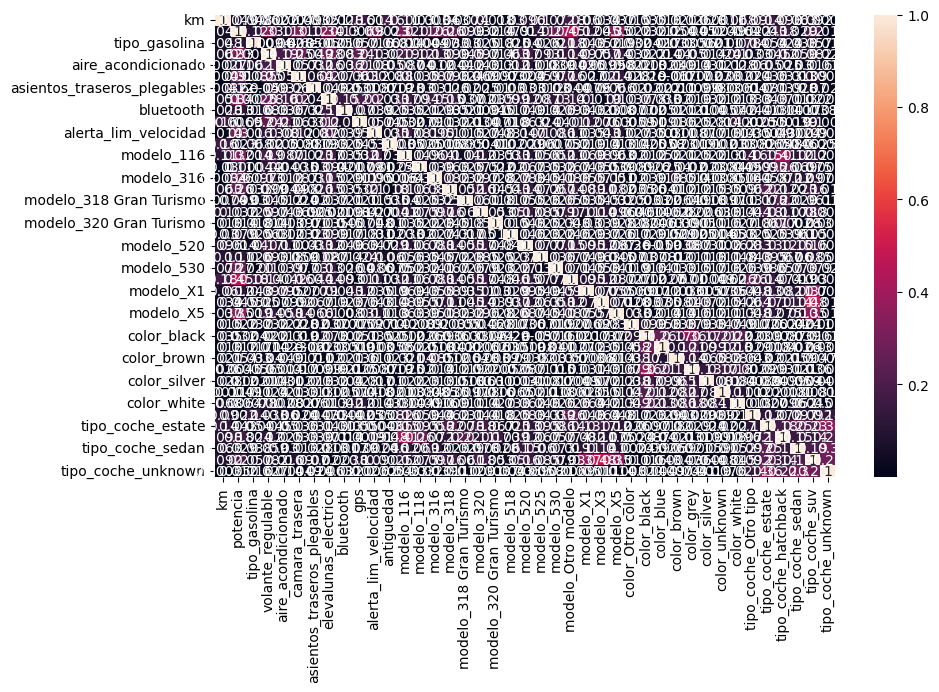

In [81]:
# Mostrar tabla correlación
sns.heatmap(X.corr().abs(),annot=True)
plt.show()

In [84]:
# Función correlación
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete


In [22]:
# no hay features altamente correlacionadas

In [85]:
# Eliminamos columnas practicamente constantes (nula varianza)
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

0  low variance features were removed:
 []


## Modelo

#### Separamos train y test

In [86]:
# Divide X-y en Train (70%) y Test (30%) - RANDOM HOLDOUT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle = True, random_state = 42)
print('Train set size:',X_train.shape[0])
print('Test set size:',X_test.shape[0])

Train set size: 3388
Test set size: 1452


In [87]:
# Mostrar valores objetivo
print('Train data instances:', len(y_train))
print('Test data instances:', len(y_test))

Train data instances: 3388
Test data instances: 1452


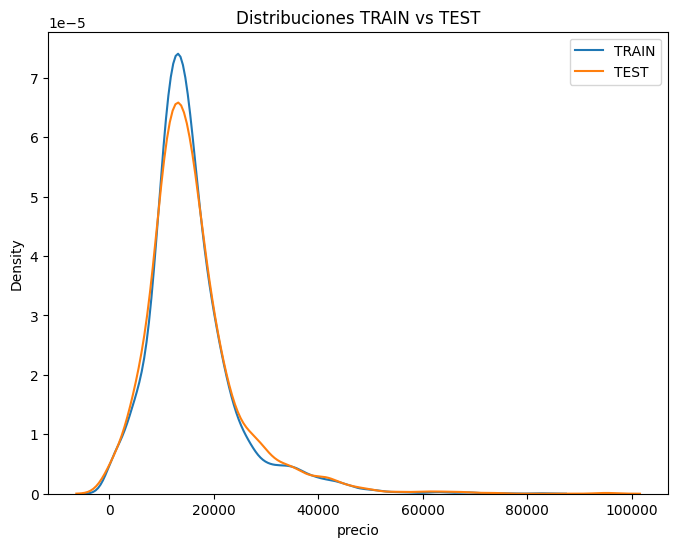

In [88]:
# Distribución target train y test
plt.figure(figsize=[8,6])
sns.kdeplot(y_train,label='TRAIN')
sns.kdeplot(y_test,label='TEST')
plt.title('Distribuciones TRAIN vs TEST')
plt.legend()
plt.show()

In [89]:
# Estandarización: fit_transform() en train, transform() en test
scaler = StandardScaler()

# Te devuelve matriz de numpy
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Lo pasas a dataframe
X_train_std = pd.DataFrame(X_train_std, columns = X_train.columns, index= X_train.index)
X_test_std = pd.DataFrame(X_test_std, columns = X_test.columns, index= X_test.index)

#### Torneo de modelos

K-Fold Cross Validation

In [90]:
def RMSE(model,X,y):
  model.fit(X,y)
  return round(np.sqrt(np.mean((y-model.predict(X))**2)),2)

def RMSE_cross_validation(model,X,y):
  Kfold_rmse = cross_val_score(model, X, y, cv=4, scoring='neg_root_mean_squared_error')
  return round(-Kfold_rmse.mean(),10)

In [91]:
# Inicializa resultados
label_ = []
rmse_train_ = []
rmse_valida_ = []

# Funcion que devuelve un dataframe con resultados de RMSE Cross Validation
def evaluate_regression(model, X, y, label=None):
  if label is None:
    label = str(model)

  rmse_train = RMSE(model,X,y)
  rmse_valida = RMSE_cross_validation(model,X,y)

  label_.append(label)
  rmse_train_.append(rmse_train)
  rmse_valida_.append(rmse_valida)

  return pd.DataFrame({'Model': label_,
                      'RMSE Train': rmse_train_,
                      'RMSE Cross-Validation': rmse_valida_
                      }).sort_values('RMSE Cross-Validation')

Modelos de regresión

In [92]:
evaluate_regression(model = LinearRegression(),
                    X=X_train_std, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
0,LinearRegression(),4505.14,4573.040232


In [93]:
# Lasso
evaluate_regression(model = Lasso(alpha=1),
                    X=X_train_std, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
1,Lasso(alpha=1),4503.17,4572.008330
0,LinearRegression(),4505.14,4573.040232


In [94]:
# Ridge
evaluate_regression(model = Ridge(alpha=1),
                    X=X_train_std, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
1,Lasso(alpha=1),4503.17,4572.008330
2,Ridge(alpha=1),4503.17,4572.012771
0,LinearRegression(),4505.14,4573.040232


In [95]:
# Elastic Net
evaluate_regression(model = ElasticNet(l1_ratio=0.5),
                    X=X_train_std, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
1,Lasso(alpha=1),4503.17,4572.008330
2,Ridge(alpha=1),4503.17,4572.012771
0,LinearRegression(),4505.14,4573.040232
3,ElasticNet(),4849.06,4892.022728


In [96]:
# Stochastic Gradient Descent
evaluate_regression(model = SGDRegressor(n_iter_no_change=100, penalty=None, eta0=0.01, max_iter=10000),
                    X=X_train_std, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
1,Lasso(alpha=1),4503.17,4572.008330
2,Ridge(alpha=1),4503.17,4572.012771
4,"SGDRegressor(max_iter=10000, n_iter_no_change=...",4507.14,4572.768963
0,LinearRegression(),4505.14,4573.040232
3,ElasticNet(),4849.06,4892.022728


In [98]:
# Naive - Bayes
evaluate_regression(model = GaussianProcessRegressor(),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
1,Lasso(alpha=1),4503.17,4572.008330
2,Ridge(alpha=1),4503.17,4572.012771
4,"SGDRegressor(max_iter=10000, n_iter_no_change=...",4507.14,4572.768963
0,LinearRegression(),4505.14,4573.040232
3,ElasticNet(),4849.06,4892.022728
5,GaussianProcessRegressor(),0.00,17852.539363
6,GaussianProcessRegressor(),0.00,17852.539363


In [99]:
# KNN Regressor
evaluate_regression(model = KNeighborsRegressor(n_neighbors = 15),
                    X=X_train_std, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
1,Lasso(alpha=1),4503.17,4572.008330
2,Ridge(alpha=1),4503.17,4572.012771
4,"SGDRegressor(max_iter=10000, n_iter_no_change=...",4507.14,4572.768963
0,LinearRegression(),4505.14,4573.040232
3,ElasticNet(),4849.06,4892.022728
7,KNeighborsRegressor(n_neighbors=15),4943.35,5306.719188
5,GaussianProcessRegressor(),0.00,17852.539363
6,GaussianProcessRegressor(),0.00,17852.539363


In [100]:
# Random Forest
evaluate_regression(model = RandomForestRegressor(n_estimators=100, max_depth=3),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
1,Lasso(alpha=1),4503.17,4572.008330
2,Ridge(alpha=1),4503.17,4572.012771
4,"SGDRegressor(max_iter=10000, n_iter_no_change=...",4507.14,4572.768963
0,LinearRegression(),4505.14,4573.040232
3,ElasticNet(),4849.06,4892.022728
7,KNeighborsRegressor(n_neighbors=15),4943.35,5306.719188
8,RandomForestRegressor(max_depth=3),5222.69,5373.549209
5,GaussianProcessRegressor(),0.00,17852.539363
6,GaussianProcessRegressor(),0.00,17852.539363


In [101]:
# Random Forest
evaluate_regression(model = RandomForestRegressor(n_estimators=100, max_depth=5),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
1,Lasso(alpha=1),4503.17,4572.008330
2,Ridge(alpha=1),4503.17,4572.012771
4,"SGDRegressor(max_iter=10000, n_iter_no_change=...",4507.14,4572.768963
0,LinearRegression(),4505.14,4573.040232
9,RandomForestRegressor(max_depth=5),4141.36,4619.594067
3,ElasticNet(),4849.06,4892.022728
7,KNeighborsRegressor(n_neighbors=15),4943.35,5306.719188
8,RandomForestRegressor(max_depth=3),5222.69,5373.549209
5,GaussianProcessRegressor(),0.00,17852.539363
6,GaussianProcessRegressor(),0.00,17852.539363


In [102]:
# XGBoost Regressor
evaluate_regression(model = XGBRegressor(objective ='reg:squarederror'),
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Validation
10,"XGBRegressor(base_score=None, booster=None, ca...",1247.93,4038.470532
1,Lasso(alpha=1),4503.17,4572.008330
2,Ridge(alpha=1),4503.17,4572.012771
4,"SGDRegressor(max_iter=10000, n_iter_no_change=...",4507.14,4572.768963
0,LinearRegression(),4505.14,4573.040232
9,RandomForestRegressor(max_depth=5),4141.36,4619.594067
3,ElasticNet(),4849.06,4892.022728
7,KNeighborsRegressor(n_neighbors=15),4943.35,5306.719188
8,RandomForestRegressor(max_depth=3),5222.69,5373.549209
5,GaussianProcessRegressor(),0.00,17852.539363


Hiperparametrización

In [123]:
XGBRegressor()

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [115]:
param_distributions = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.5],
    'min_child_weight': [1, 5, 10],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 1, 10]
}

In [116]:
search_hp = RandomizedSearchCV(
    estimator=XGBRegressor(), 
    param_distributions=param_distributions, 
    n_iter=100,  # Número de combinaciones a probar
    scoring='neg_root_mean_squared_error',
    cv=4,  # Validación cruzada con 4 folds
    verbose=True,
    random_state=42,
    n_jobs=-1
)

In [117]:
search_hp.fit(X_train, y_train)

Fitting 4 folds for each of 100 candidates, totalling 400 fits


RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'gamma': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'min_child_weight': [1, 5, 10],
                                        'n_estimators': [50, 100, 200],
                                        'reg_alpha': [0, 0.1, 1],
                                        'reg_lambda': [0, 1, 10],
                                        'subsample': [0.7, 0.8, 1.0]},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=True)

In [118]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best RMSE:", -search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

---- Results from Random Search -----

 The best estimator across ALL searched params: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

 The best RMSE: 3650.446865414192

 The best parameters across ALL searched params:
 {'subsample': 0.8, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight':

In [119]:
model = search_hp.best_estimator_

### Test

In [120]:
# Vemos las predicciones que hace el modelo en test y en train
y_train_pred = model.predict(X_train)              # predicciones del modelo en los datos de TRAIN
y_test_pred = model.predict(X_test)                # predicciones del modelo en los datos de TEST

#### Error

In [121]:
# Calculamos el error
error = y_test_pred - y_test.values

In [122]:
# Métricas del error
mae = np.mean(np.abs(error))
mape = np.mean(error/y_test)
mse = np.mean(error**2)
rmse = np.sqrt(np.mean(error**2))

print('RMSE:', round(rmse,4))
print('MAE:', round(mae,4))
print('MAPE: {:.3%}'.format(mape))
print('R2-Score: {:.2%}'.format(r2_score(y_test, y_test_pred)))

RMSE: 4013.935
MAE: 2433.0254
MAPE: 54.204%
R2-Score: 80.82%


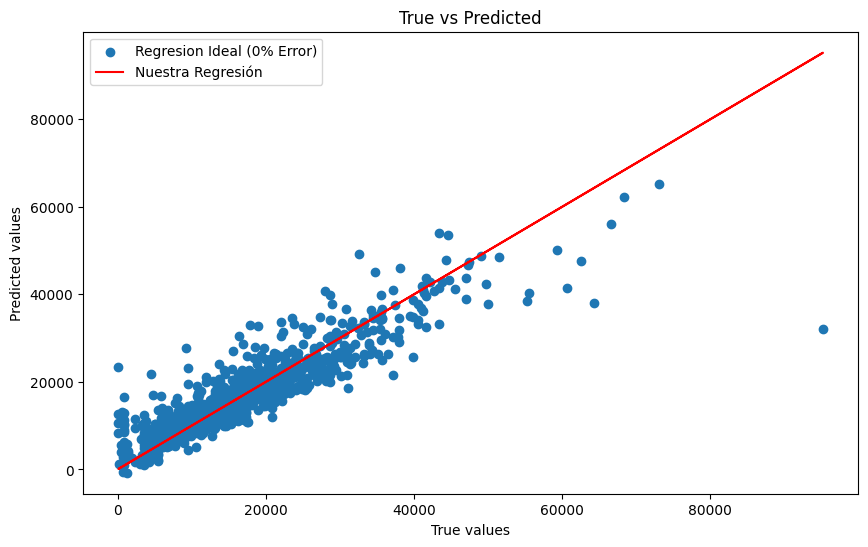

In [124]:
# Gráfico que compara Prediccion vs dato real
plt.figure(figsize=[10,6])
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r')
plt.title('True vs Predicted')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(['Regresion Ideal (0% Error)','Nuestra Regresión'])
plt.show()

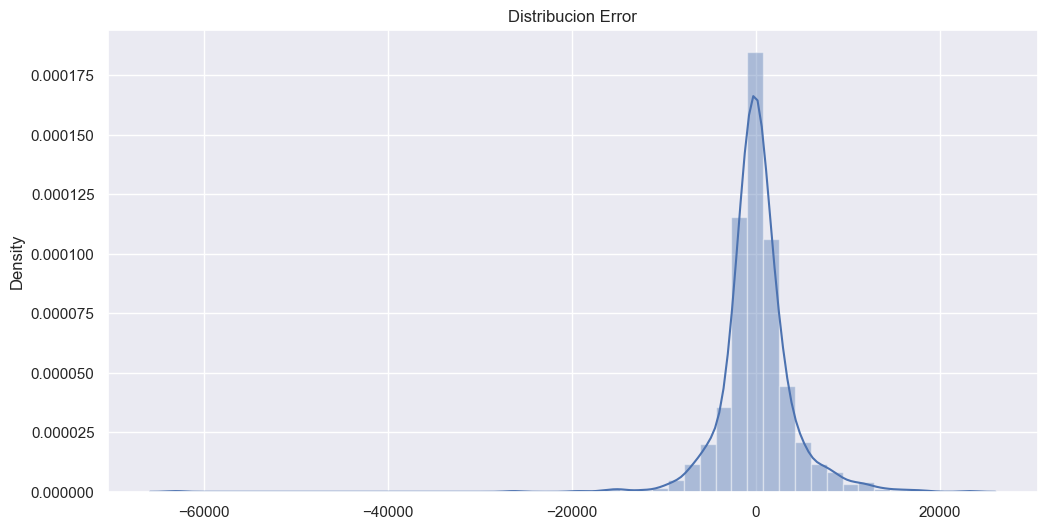

In [125]:
# Distribución del error
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribucion Error')
plt.show()

In [126]:
# Describe estadísticamente el error
round(pd.Series(error).describe(),2)

count     1452.00
mean        87.98
std       4014.35
min     -63043.82
25%      -1475.49
50%        -29.56
75%       1521.83
max      23204.59
dtype: float64

In [127]:
# Intervalo del error
confidence=95
z = (100-confidence)/2
print("Intervalo del error (confianza",confidence,"%):",round(np.percentile(error, 100-z),1),"/",round(np.percentile(error, z),1))

Intervalo del error (confianza 95 %): 8433.6 / -6957.8


#### Interpretabilidad

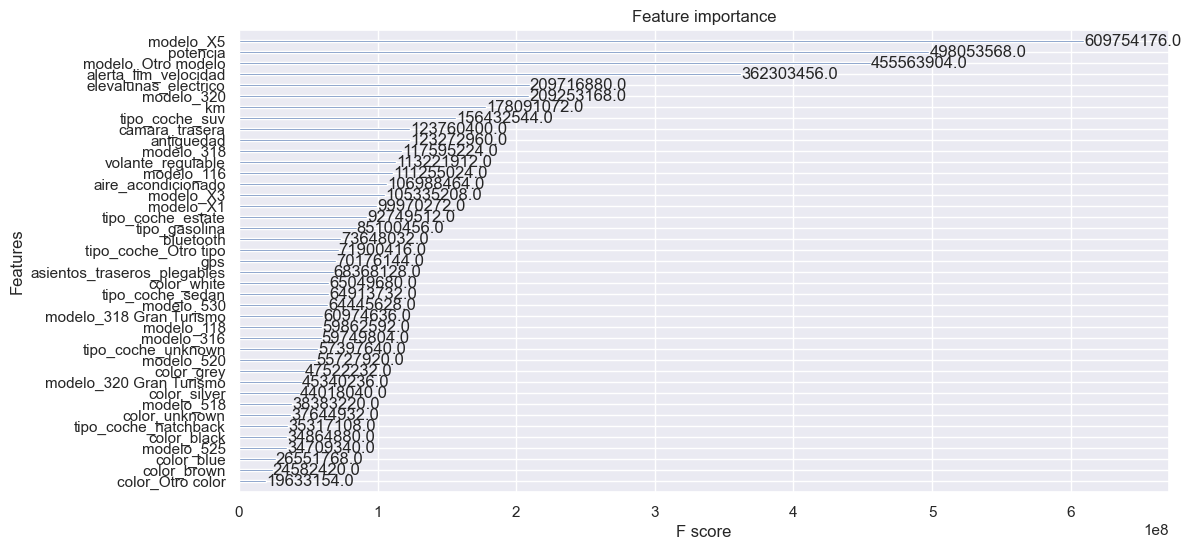

In [132]:
from xgboost import plot_importance

plot_importance(model, importance_type='gain')  # Otras opciones: 'weight', 'cover'
plt.show()

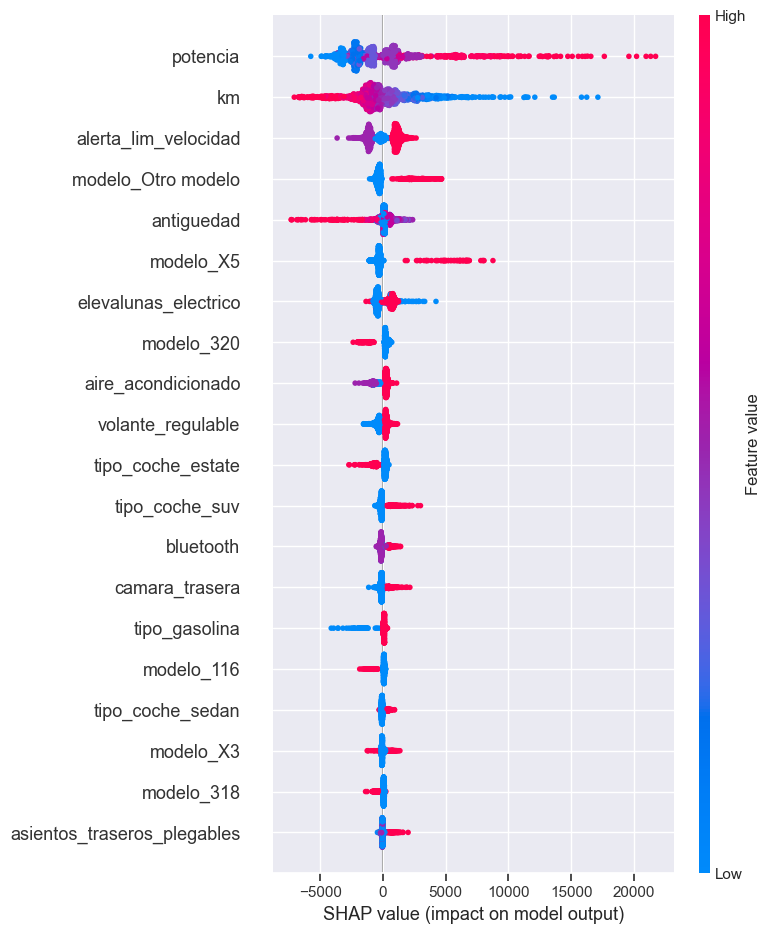

In [135]:
import shap

explainer = shap.Explainer(model)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test)

### Guardamos el modelo

In [136]:
pickle.dump(model,open('modelo.pkl','wb'))